In [57]:
%matplotlib inline

In [58]:
from data_management import get_data

gx_volume = get_data()

<AxesSubplot:ylabel='Frequency'>

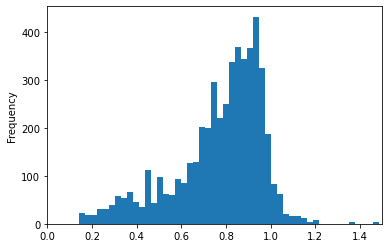

In [59]:
gx_volume[gx_volume['month_num'] == 0]['ratio'].plot.hist(bins=50, xlim=(0, 1.5))

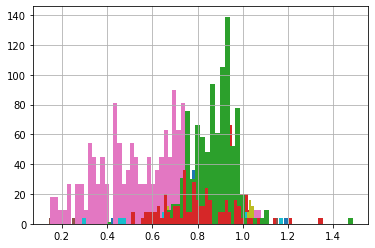

In [60]:
gx_volume[gx_volume['month_num'] == 0].groupby('country')['ratio'].hist(bins=50);

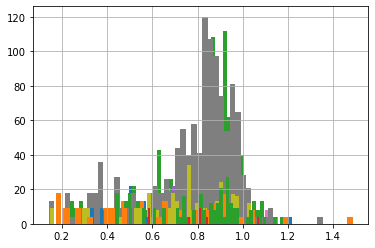

In [61]:
gx_volume[gx_volume['month_num'] == 0].groupby('therapeutic_area')['ratio'].hist(bins=50);

<AxesSubplot:ylabel='Frequency'>

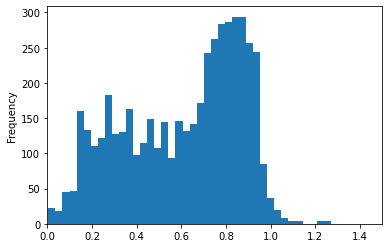

In [62]:
gx_volume[gx_volume['month_num'] == 2]['ratio'].plot.hist(bins=50, xlim=(0, 1.5))

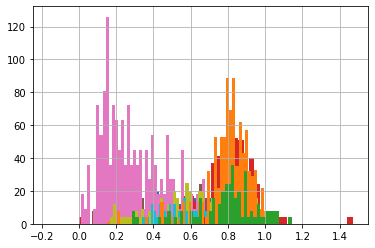

In [63]:
ax = gx_volume[gx_volume['month_num'] == 3].groupby('country')['ratio'].hist(bins=50);

<AxesSubplot:ylabel='Frequency'>

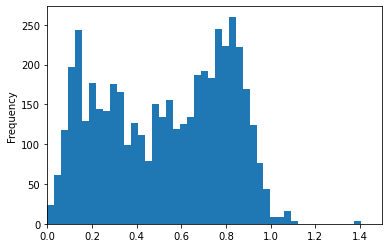

In [64]:
gx_volume[gx_volume['month_num'] == 5]['ratio'].plot.hist(bins=50, xlim=(0, 1.5))

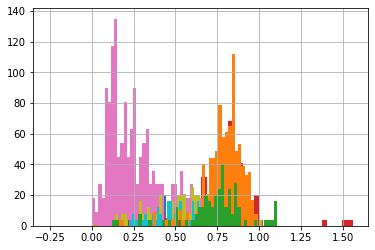

In [65]:
ax = gx_volume[gx_volume['month_num'] == 5].groupby('country')['ratio'].hist(bins=50);

<AxesSubplot:ylabel='Frequency'>

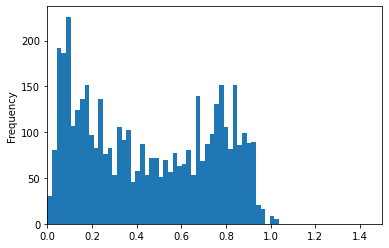

In [66]:
gx_volume[gx_volume['month_num'] == 11]['ratio'].plot.hist(bins=50, xlim=(0, 1.5))

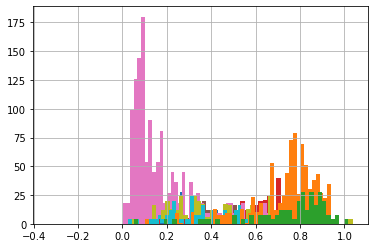

In [67]:
ax = gx_volume[gx_volume['month_num'] == 11].groupby('country')['ratio'].hist(bins=50);

<AxesSubplot:ylabel='Frequency'>

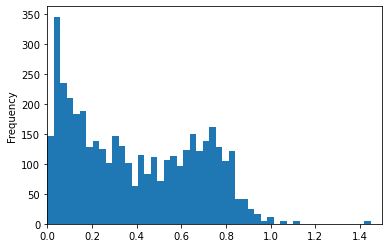

In [68]:
gx_volume[gx_volume['month_num'] == 17]['ratio'].plot.hist(bins=50, xlim=(0, 1.5))

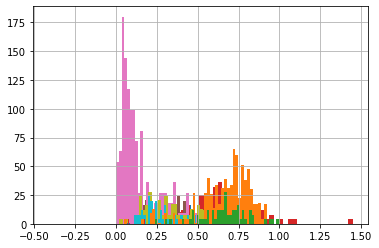

In [69]:
ax = gx_volume[gx_volume['month_num'] == 17].groupby('country')['ratio'].hist(bins=50);

<AxesSubplot:ylabel='Frequency'>

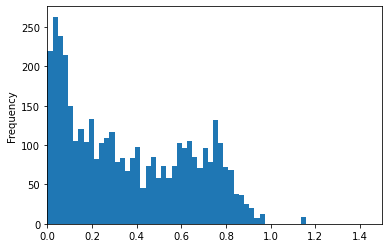

In [70]:
gx_volume[gx_volume['month_num'] == 23]['ratio'].plot.hist(bins=50, xlim=(0, 1.5))

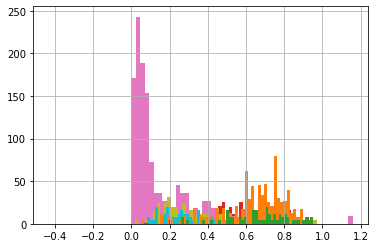

In [71]:
ax = gx_volume[gx_volume['month_num'] == 23].groupby('country')['ratio'].hist(bins=50);

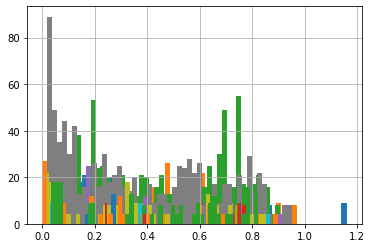

In [72]:
gx_volume[gx_volume['month_num'] == 23].groupby('therapeutic_area')['ratio'].hist(bins=50);

<AxesSubplot:>

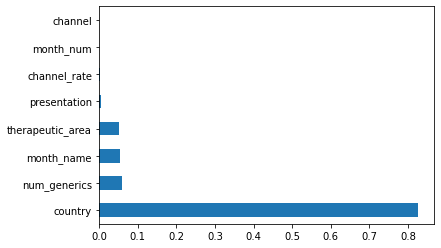

In [77]:
# Caracterizamos Admission Time
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn import preprocessing
import pandas as pd

le = preprocessing.LabelEncoder()

data_X = gx_volume[gx_volume['month_num'] == 23].drop(['ratio', 'brand', 'volume', 'volume_1'], axis=1)

data_X.country = le.fit(data_X.country.unique()).transform(data_X.country)
data_X.presentation = le.fit(data_X.presentation.unique()).transform(data_X.presentation)
data_X.month_name = le.fit(data_X.month_name.unique()).transform(data_X.month_name)
data_X.therapeutic_area = le.fit(data_X.therapeutic_area.unique()).transform(data_X.therapeutic_area)
data_X.channel = le.fit(data_X.channel.unique()).transform(data_X.channel)


data_Y = gx_volume[gx_volume['month_num'] == 23]['ratio']

decision_tree = DecisionTreeRegressor(random_state=0, max_depth=5)
decision_tree = decision_tree.fit(data_X, data_Y)
feat_importances = pd.Series(decision_tree.feature_importances_, index=data_X.columns)
feat_importances.nlargest(10).plot(kind='barh')
